## <span style = 'color:violet'>INSURANCE PREDICTION</span>

#### <span style = 'color:violet'>Importing Important libraries</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, r2_score, mean_absolute_error

In [2]:
train_data = pd.read_csv("./train_data.csv")
test_data = pd.read_csv("./test_data.csv")
var_desc = pd.read_csv("./VariableDescription.csv")
ss = pd.read_csv("./SampleSubmission.csv")

In [3]:
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


In [4]:
var_desc

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [6]:
train_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
mode_geo_code = train_data['Geo_Code'].mode()[0]
train_data['Geo_Code'].fillna(mode_geo_code, inplace=True)

In [8]:
mode_garden = train_data['Garden'].mode()[0]
train_data['Garden'].fillna(mode_garden, inplace=True)
train_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code                0
Claim                   0
dtype: int64

<AxesSubplot:>

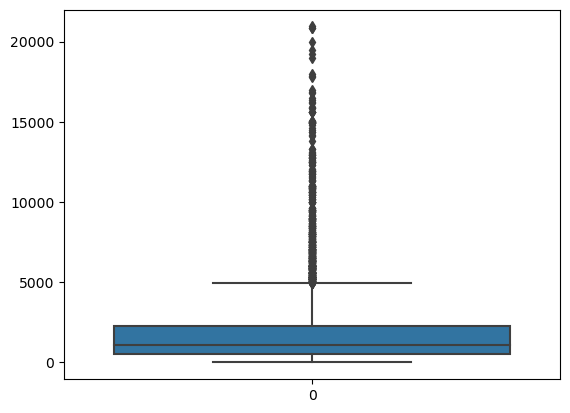

In [9]:
sns.boxplot(train_data['Building Dimension'])

<AxesSubplot:>

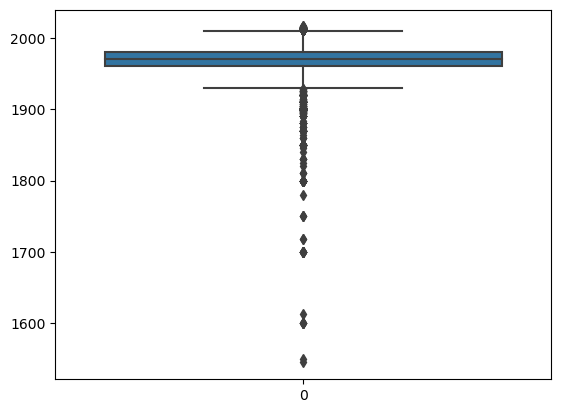

In [10]:
sns.boxplot(train_data['Date_of_Occupancy'])

In [11]:
median_build_dim = train_data['Building Dimension'].median()
median_date_occ = train_data['Date_of_Occupancy'].median()
train_data['Building Dimension'].fillna(median_build_dim, inplace=True)
train_data['Date_of_Occupancy'].fillna(median_date_occ, inplace=True)
train_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [12]:
target_col = 'Claim'
base_X = train_data.drop(columns=target_col, axis=1)
base_Y = train_data[target_col]

In [13]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary')
le = LabelEncoder()
oe = OrdinalEncoder(categories =[['1', '2', '3', '4', '5', '6', '7', '8', '9', '>=10']])
def preprocessed(data):
    
    mode_garden = data['NumberOfWindows'][data.NumberOfWindows != '   .'].mode()[0]
    data.loc[data.NumberOfWindows == '   .', 'NumberOfWindows'] = mode_garden
    #drop unnecessary columns
    
    new_data = data.drop(columns=['Customer Id', "Geo_Code"], axis=1)
        
    categories = ["Settlement"]
    new_data['NumberOfWindows'] = oe.fit_transform(new_data[['NumberOfWindows']])
    new_data['Building_Painted'] = le.fit_transform(new_data['Building_Painted'])
    new_data['Garden'] = le.fit_transform(new_data['Garden'])
    new_data['Building_Fenced'] = le.fit_transform(new_data['Building_Fenced'])
    new_data[ohe.get_feature_names_out()] = ohe.fit_transform(new_data[categories])
    new_data.drop(columns=categories, axis=1, inplace=True)
    
    scaler = StandardScaler()
    new_data = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)
    
    return new_data

In [14]:
new_X = preprocessed(base_X)
new_X

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Settlement_U
0,-0.483896,0.376419,-0.663155,-1.739827,1.007852,1.008134,-0.698973,-1.260978,-0.139649,-0.129326,1.008415
1,0.961534,0.376419,-0.663155,0.574770,-0.992209,-0.991932,-0.610600,-1.260978,-3.307129,-0.129326,-0.991655
2,0.238819,0.376419,-0.663155,-1.739827,1.007852,1.008134,-0.564205,-1.260978,-0.139649,-0.129326,1.008415
3,-0.483896,0.376419,-0.663155,0.574770,1.007852,1.008134,0.427781,-1.260978,-0.139649,-0.129326,1.008415
4,0.238819,0.376419,-0.663155,0.574770,-0.992209,-0.991932,-0.526646,-1.260978,-4.746893,-0.900968,-0.991655
...,...,...,...,...,...,...,...,...,...,...,...
7155,-1.206611,0.376419,1.507943,0.574770,1.007852,1.008134,-0.348575,-1.260978,1.040957,-0.129326,1.008415
7156,-0.483896,0.376419,-0.663155,0.574770,1.007852,1.008134,-0.348575,-0.197789,0.436256,-0.129326,1.008415
7157,1.684248,-3.635231,-0.663155,0.574770,1.007852,1.008134,-0.348575,-1.260978,0.781800,-0.129326,1.008415
7158,-0.483896,0.376419,-0.663155,0.574770,1.007852,1.008134,-0.348575,-1.260978,0.205894,-0.129326,1.008415


In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_X, base_Y, test_size=0.2, random_state=42, stratify=base_Y)

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier

In [17]:
models = [('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest Classifier', RandomForestClassifier()),
          ('Support Vector Classifier', SVC()),
          ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
          ('Gradient Boosting Classifier', GradientBoostingClassifier()),
          ('Logistic Regression Classifier', LogisticRegression()),
          ('Naive Bayes Classifier', GaussianNB()),
          ('Multilayer Perceptron', MLPClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('XGBoost', XGBClassifier()),
          ('Bagged Decision Trees', BaggingClassifier(base_estimator=DecisionTreeClassifier())),
          ('Ridge Classifier', RidgeClassifier())]

In [18]:
def ratings(models, X_train, y_train, X_test, y_test):
    ratings = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC'])
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        ratings = ratings.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc}, ignore_index=True)
    return ratings

In [19]:
base_ratings = ratings(models, X_train, y_train, X_test, y_test)
base_ratings

C:\Users\USER\AppData\Local\Temp\ipykernel_14200\2589134725.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc}, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14200\2589134725.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc}, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14200\2589134725.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratings = ratings.append({'Model': name, 'Accuracy': accuracy, 'AUC': auc}, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14200\2589134725.py:8: FutureWarning: The frame.append method is depr

,Model,Accuracy,AUC
0,Decision Tree Classifier,0.694832,0.574031
1,Random Forest Classifier,0.761872,0.590556
2,Support Vector Classifier,0.780028,0.545263
3,K-Nearest Neighbors Classifier,0.752095,0.570226
4,Gradient Boosting Classifier,0.787709,0.586843
5,Logistic Regression Classifier,0.782123,0.561692
6,Naive Bayes Classifier,0.774441,0.606237
7,Multilayer Perceptron,0.780726,0.575859
8,AdaBoost,0.786313,0.583785
9,XGBoost,0.775838,0.590993


In [20]:
base_ratings.sort_values(by='AUC', ascending=False, inplace=True)
base_ratings

,Model,Accuracy,AUC
6,Naive Bayes Classifier,0.774441,0.606237
9,XGBoost,0.775838,0.590993
1,Random Forest Classifier,0.761872,0.590556
4,Gradient Boosting Classifier,0.787709,0.586843
8,AdaBoost,0.786313,0.583785
7,Multilayer Perceptron,0.780726,0.575859
0,Decision Tree Classifier,0.694832,0.574031
10,Bagged Decision Trees,0.755587,0.573565
3,K-Nearest Neighbors Classifier,0.752095,0.570226
5,Logistic Regression Classifier,0.782123,0.561692


In [21]:
from scipy.stats import randint, uniform
hyperparameters = {'Decision Tree Classifier': {'criterion': ['gini', 'entropy'],
                                                'max_depth': range(1, 21),
                                                'min_samples_split': range(2, 11),
                                                'min_samples_leaf': range(1, 11)},
                   'Random Forest Classifier': {'n_estimators': range(50, 251, 50),
                                                'criterion': ['gini', 'entropy'],
                                                'max_depth': range(1, 21),
                                                'min_samples_split': range(2, 11),
                                                'min_samples_leaf': range(1, 11)},
                   'Support Vector Classifier': {'C': [0.01, 0.1, 1, 10, 100],
                                                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                                 'degree': [2, 3, 4, 5, 6]},
                   'K-Nearest Neighbors Classifier': {'n_neighbors': range(1, 51),
                                                      'weights': ['uniform', 'distance'],
                                                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
                   'Gradient Boosting Classifier': {'learning_rate': [0.001, 0.01, 0.1, 1],
                                                    'n_estimators': range(50, 251, 50),
                                                    'max_depth': range(1, 6),
                                                    'min_samples_split': range(2, 11),
                                                    'min_samples_leaf': range(1, 11)},
                   'Logistic Regression Classifier': {'C': range(1, 101)},
                   'Naive Bayes Classifier': {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]},
                   'Multilayer Perceptron': {"hidden_layer_sizes": [(i,) for i in range(10, 101, 10)] + [(i, j) for i in range(10, 101, 10) for j in range(10, 101, 10)],
                                             "activation": ["logistic", "tanh", "relu"],
                                             "solver": ["lbfgs", "adam"],
                                             "alpha": [10 ** i for i in range(-6, 1)],
                                             "learning_rate": ["constant", "invscaling", "adaptive"],
                                             "max_iter": randint(100, 1000),},
                   'AdaBoost': {'n_estimators': range(50, 251, 50),
                                'learning_rate': [0.001, 0.01, 0.1, 1],
                                'algorithm': ['SAMME', 'SAMME.R']},
                   'XGBoost': {'n_estimators': range(50, 251, 50),
                               'max_depth': range(1, 6),
                               'learning_rate': [0.001, 0.01, 0.1, 1],
                               'min_child_weight': range(1, 11),
                               'gamma': [i/10.0 for i in range(0, 5)]},
                   'Bagged Decision Trees':{'n_estimators': randint(10, 100),
                                            'max_samples': [0.5, 0.7, 0.9, 1.0],
                                            'max_features': [0.5, 0.7, 0.9, 1.0],
                                            'base_estimator__max_depth': [None, 5, 10, 15],
                                            'base_estimator__min_samples_split': randint(2, 20),
                                            'base_estimator__min_samples_leaf': randint(1, 10),
                                            'base_estimator__max_features': ['auto', 'sqrt', 'log2']},
                   'Ridge Classifier':{'alpha': uniform(0, 10),
                                       'fit_intercept': [True, False],
                                       'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}}

In [22]:
#from sklearn.model_selection import GridSearchCV

#def tuning(name, model, param_dict, X, Y):
    #grid = GridSearchCV(model, param_dict[name], cv=10, scoring=['accuracy', 'roc_auc'], refit='roc_auc', n_jobs=-1)
    #grid.fit(X, Y)
    #best_score = grid.best_score_
    #best_param = grid.best_params_
    #return best_score, best_param
    
from sklearn.model_selection import RandomizedSearchCV

def random_search(model, name, params, X, Y):
    
    # create a randomized search object
    search = RandomizedSearchCV(model, params, scoring='roc_auc', cv=10, n_iter=50, random_state=42, n_jobs=-1, verbose=2)

    # fit the randomized search object to the training data
    search.fit(X, Y)
    
    best_score = search.best_score_
    best_param = search.best_params_
    # return the best estimator found by the search
    return best_score, best_param


scoring = pd.DataFrame(columns=['Model', 'Best Score'])
parameters = {}

In [23]:
scoring = pd.DataFrame(columns=['Model', 'Best Score'])
parameters = {'Decision Tree Classifier': {'min_samples_split': 9,
                                           'min_samples_leaf': 4,
                                           'max_depth': 4,
                                           'criterion': 'entropy'},
              'Random Forest Classifier': {'n_estimators': 200,
                                           'min_samples_split': 10,
                                           'min_samples_leaf': 9,
                                           'max_depth': 6,
                                           'criterion': 'entropy'},
              'K-Nearest Neighbors Classifier': {'weights': 'uniform',
                                                 'n_neighbors': 49,
                                                 'algorithm': 'brute'},
              'Gradient Boosting Classifier': {'n_estimators': 200,
                                               'min_samples_split': 6,
                                               'min_samples_leaf': 4,
                                               'max_depth': 1,
                                               'learning_rate': 0.1},
              'Logistic Regression Classifier': {'C': 1},
              'Naive Bayes Classifier': {'var_smoothing': 1e-05},
              'AdaBoost': {'n_estimators': 250,
                           'learning_rate': 0.1,
                           'algorithm': 'SAMME.R'},
              'XGBoost': {'n_estimators': 200,
                          'min_child_weight': 6,
                          'max_depth': 1,
                          'learning_rate': 0.1,
                          'gamma': 0.1},
              'Bagged Decision Trees': {'base_estimator__max_depth': 5,
                                        'base_estimator__max_features': 'log2',
                                        'base_estimator__min_samples_leaf': 2,
                                        'base_estimator__min_samples_split': 2,
                                        'max_features': 1.0,
                                        'max_samples': 0.9,
                                        'n_estimators': 73},
              'Ridge Classifier': {'alpha': 7.319939418114051,
                                   'fit_intercept': True,
                                   'solver': 'sparse_cg'}}

In [24]:
parameters

{'Decision Tree Classifier': {'min_samples_split': 9,
  'min_samples_leaf': 4,
  'max_depth': 4,
  'criterion': 'entropy'},
 'Random Forest Classifier': {'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 9,
  'max_depth': 6,
  'criterion': 'entropy'},
 'K-Nearest Neighbors Classifier': {'weights': 'uniform',
  'n_neighbors': 49,
  'algorithm': 'brute'},
 'Gradient Boosting Classifier': {'n_estimators': 200,
  'min_samples_split': 6,
  'min_samples_leaf': 4,
  'max_depth': 1,
  'learning_rate': 0.1},
 'Logistic Regression Classifier': {'C': 1},
 'Naive Bayes Classifier': {'var_smoothing': 1e-05},
 'AdaBoost': {'n_estimators': 250,
  'learning_rate': 0.1,
  'algorithm': 'SAMME.R'},
 'XGBoost': {'n_estimators': 200,
  'min_child_weight': 6,
  'max_depth': 1,
  'learning_rate': 0.1,
  'gamma': 0.1},
 'Bagged Decision Trees': {'base_estimator__max_depth': 5,
  'base_estimator__max_features': 'log2',
  'base_estimator__min_samples_leaf': 2,
  'base_estimator__min_samples_

In [ ]:
name, model = models[7]

best_score, best_params = random_search(model, name, hyperparameters[name], new_X, base_Y)
parameters[name] = best_params
scoring = scoring.append({'Model': name, 'Best Score': best_score}, ignore_index=True)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [20]:
ss

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1
...,...,...
3063,H9987,1
3064,H9988,1
3065,H9994,1
3066,H9996,1


In [110]:
test_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.000000,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.000000,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.000000,0,V,V,V,U,NaN,1,1800.0,.,NaN


In [152]:
test_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [153]:
train_data.groupby('Geo_Code').count()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
Geo_Code,,,,,,,,,,,,,
10033,1,1,1,1,1,1,1,1,1,1,1,1,1
10081,1,1,1,1,1,1,1,1,1,1,1,1,1
10297,1,1,1,1,1,1,1,1,1,1,1,1,1
10333,4,4,4,4,4,4,4,4,4,4,4,4,4
10343,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95563,3,3,3,3,3,3,3,3,3,3,3,3,3
95582,3,3,3,3,3,3,3,3,2,3,2,3,3
95585,7,7,7,7,7,7,7,7,7,7,7,7,7


In [154]:
mode_geo_code = test_data['Geo_Code'].mode()[0]
test_data['Geo_Code'].fillna(mode_geo_code, inplace=True)
mode_garden = test_data['Garden'].mode()[0]
test_data['Garden'].fillna(mode_garden, inplace=True)
test_data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code                0
dtype: int64

In [155]:
median_build_dim = test_data['Building Dimension'].median()
median_date_occ = test_data['Date_of_Occupancy'].median()
test_data['Building Dimension'].fillna(median_build_dim, inplace=True)
test_data['Date_of_Occupancy'].fillna(median_date_occ, inplace=True)
test_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [156]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3069 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3069 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   3069 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3069 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [157]:
final_test = preprocessed(test_data)
final_test

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Settlement_U
0,-0.432737,0.352438,-0.537545,0.906888,-1.643792,-1.649242,-0.606938,-1.361714,-0.320750,-0.327479,-1.643792
1,1.753988,0.339964,-0.537545,0.906888,-1.643792,-1.649242,-0.606938,-1.361714,-0.320750,-0.327479,-1.643792
2,-0.432737,-2.524508,-0.537545,0.906888,0.608350,0.606339,-0.388830,-1.361714,-0.320750,-0.327479,0.608350
3,0.296171,0.352438,-0.537545,0.906888,-1.643792,-1.649242,-0.115082,-1.361714,1.675230,-0.327479,-1.643792
4,1.753988,0.352438,-0.537545,0.906888,-1.643792,-1.649242,-0.115082,-1.361714,1.675230,-0.327479,-1.643792
...,...,...,...,...,...,...,...,...,...,...,...
3064,1.025079,0.352438,-0.537545,0.906888,0.608350,0.606339,-0.339867,1.643391,-3.042540,-0.327479,0.608350
3065,-1.161646,0.352438,-0.537545,0.906888,0.608350,0.606339,-0.339867,-0.360012,-0.865108,-0.327479,0.608350
3066,-1.161646,0.352438,-0.537545,0.906888,0.608350,0.606339,-0.339867,-0.360012,1.176235,-0.327479,0.608350
3067,-0.432737,0.352438,-0.537545,0.906888,0.608350,0.606339,-0.339867,-1.361714,-7.578858,-0.327479,0.608350


In [158]:
test_results = xgb.predict(final_test)
test_results

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
results = pd.DataFrame({'Customer Id': test_data["Customer Id"], 'Claim': test_results})
results

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
...,...,...
3064,H11583,0
3065,H11720,0
3066,H11721,0
3067,H12408,0


In [160]:
results.sort_values(by='Customer Id', inplace=True)
results

,Customer Id,Claim
1060,H0,0
715,H10000,0
509,H10001,0
852,H10002,0
853,H10003,0
...,...,...
506,H9987,0
507,H9988,0
1588,H9994,0
936,H9996,0


In [161]:
results.to_csv('second_submission.csv', index=False)